# Heart Disease Prediction


## Importing required Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Create a Dataframe

In [2]:
data = pd.read_csv(r"C:\Users\Vaishnavi Daule\Downloads\archive (15)\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Exploration


In [3]:
data.shape

(1025, 14)

In [4]:
data.size

14350

# Columns Name
1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14.target

In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [6]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## EDA
### Cheaking missing value

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Cheaking duplicate value

In [10]:
data_dupli = data.duplicated().any()
print(data_dupli)

True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(302, 14)

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation between feature

<Axes: >

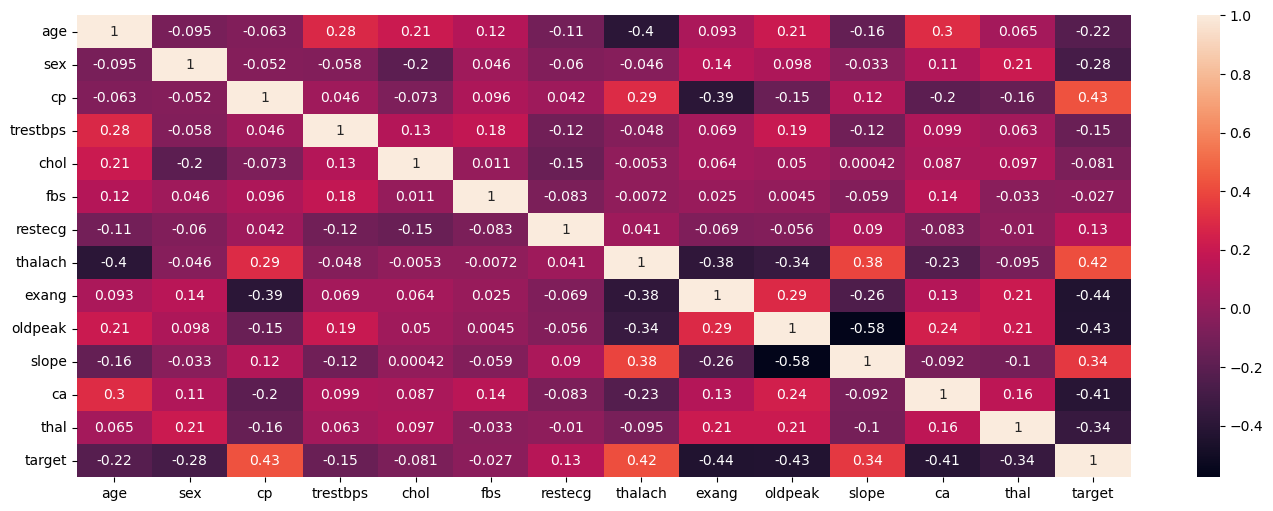

In [15]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

In [17]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

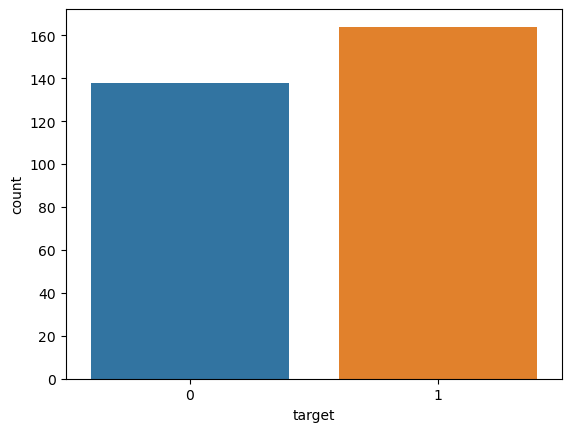

In [19]:
sns.countplot(x='target', data=data)


# insights
* 0 indicates that a person does not have heart disease.

* 1 indicates that a person has heart disease.

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

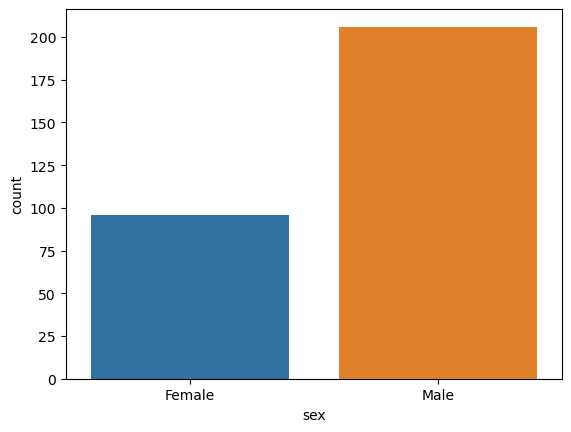

In [22]:
sns.countplot(x='sex', data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

# insights
* compare to female,male have more heart disease

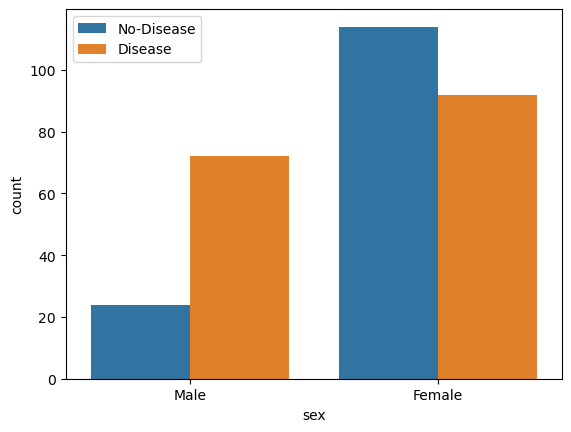

In [26]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])

# insight
*In disease and non disease the males are more compare

# Check Age Distribution

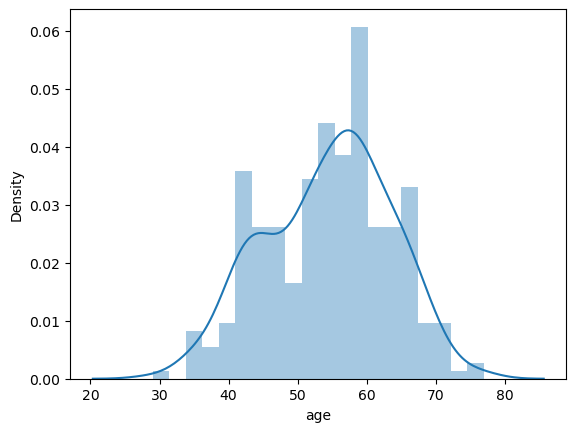

In [28]:
sns.distplot(data['age'],bins=20)
plt.show()

# insights
* Most people in the age range of 60 to 80 have had a heart attack.


## Check Chaist pain type
* Chest pain type has 4values
  * Value 0: typical angina
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: asmptomatic

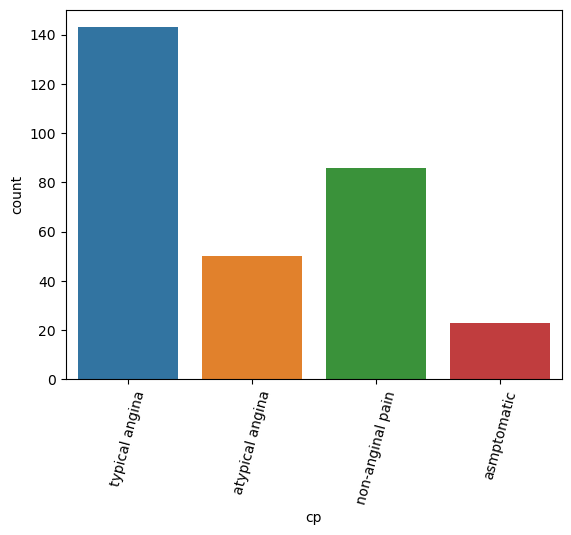

In [31]:
sns.countplot(x='cp',data=data)
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asmptomatic'])
plt.xticks(rotation=75)
plt.show()

# insights
* typical angina is more common to people 
* asmptomatic is less occure in people compare ohter three

## Show The Chest Pain Distribution As Per Target Variable

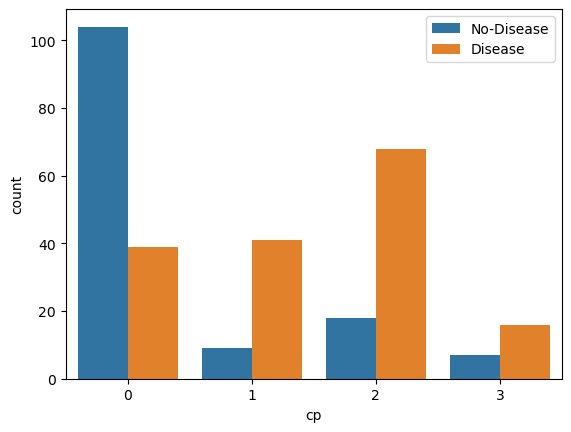

In [32]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# Show Fasting Blood Sugar Distribution According To Target Variable

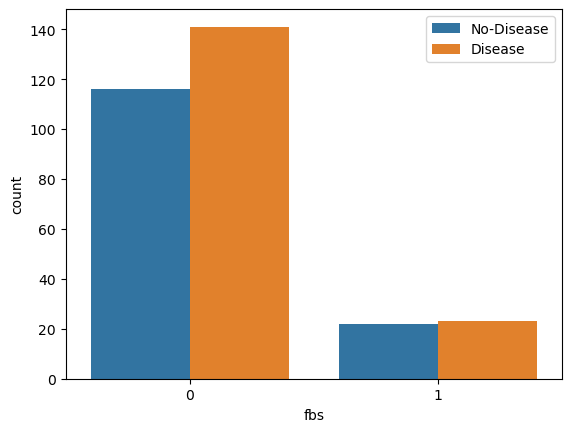

In [34]:
sns.countplot(x='fbs',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## Check Resting Blood Pressure Distribution

<Axes: >

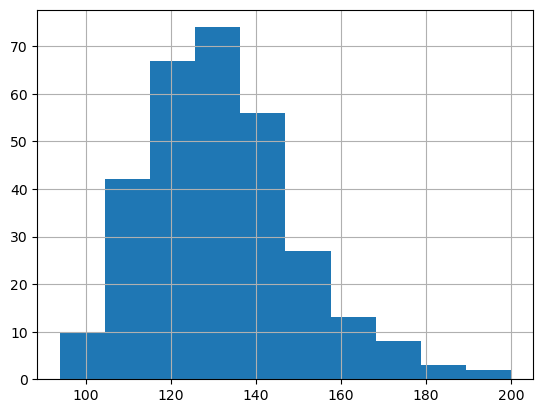

In [36]:
data['trestbps'].hist()

# insights 
* we can see here high resting blood pressure in between 120-200 

## Compare Resting Blood Pressure As Per Sex Column


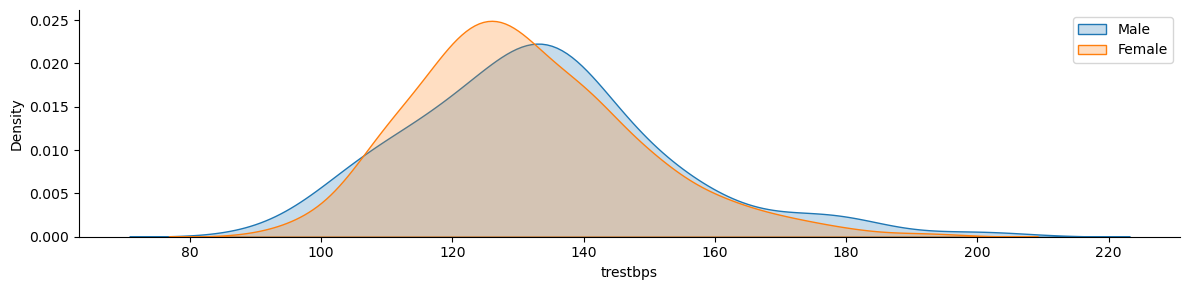

In [37]:
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

# insights
* Female cantidates has more trestbps compare to male.

## Show Distribution of Serum Cholesterol

<Axes: >

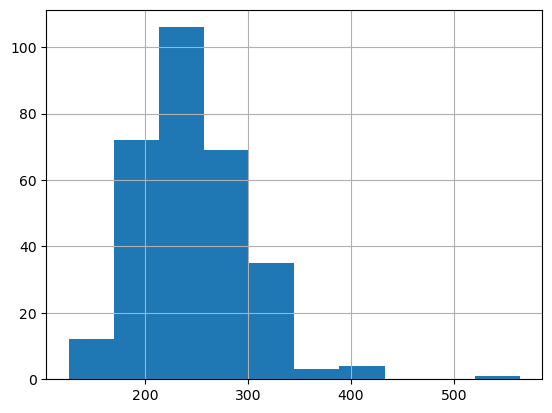

In [39]:
data['chol'].hist()

# Plot Continuous Variables

In [40]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [41]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [42]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

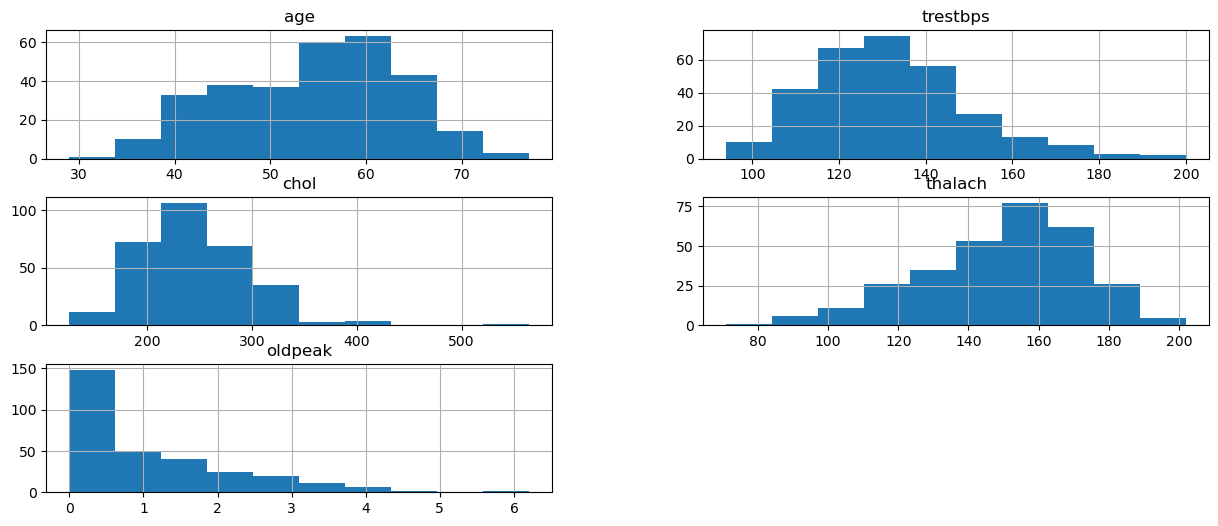

In [43]:
data.hist(cont_val,figsize=(15,6))
plt.show()

# Model training

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [54]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

# insights 
1 represent healthy heart 

0 represent failed heart 


Spliting the features and target 

In [55]:
X = data.drop(columns ='target',axis =1)
Y = data['target']

In [56]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [57]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

# Spliting the data into training and testing


In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state =2)

In [59]:
X_train.shape

(241, 13)

In [60]:
X_test.shape

(61, 13)

In [61]:
Y_train.shape

(241,)

In [62]:
Y_test.shape

(61,)

# Model Training

In [63]:
model = LogisticRegression()

In [64]:
#Training the Logistic regression model using training data
model.fit(X_train,Y_train)

LogisticRegression()

Model Evalution

Accuracy Score

In [67]:
#accuracy on traing data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

In [68]:
print('Accuracy on Training Data :', training_data_accuracy)

Accuracy on Training Data : 0.8464730290456431


In [69]:
#accuracy on traing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction ,Y_test)

In [70]:
print('Accuracy on Test Data :', test_data_accuracy)

Accuracy on Test Data : 0.9016393442622951


# Bulding a predictive system

In [71]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1,3)

In [72]:
#chnage input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

In [73]:
#reshape the numpy array as we are predicting for only instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [74]:
prediction = model.predict(input_data_reshaped)

In [75]:
print(prediction)

[0]


In [76]:
if (prediction[0]==0):
    print('The person does not Heart Disease')
else:
    print('The Person has heart Disease')

The person does not Heart Disease
